The purpose of this notebook is to plot normalized inter-class variance results.

Below are descriptions of the input parameters:

- input_path: The path to the directory containing the tvla results to plot. The plots are also saved in this directory.
- target_byte: The specific target byte being plotted. This value corresponds to the specific .csv file that will be plotted.
- overriding_max_y_tick_val: This is a boolean parameter that can override the max y-tick value. If True, the plot's y-axis ticks will be determined by the program. Otherwise, the max y-tick will be 1.

In [1]:
import os, sys
import pandas as pd
from math import floor, ceil

# setting the utilities required for loading the data and training the model
sys.path.append('../utilities/')
from graphGenerationUtilities import *

%load_ext autotime

In [2]:
data_params = {
    "input_path":"../results/FPGA/normalized-inter-class-variance/fpga_target1_k0_50k_ethan_0401/", # Path to load the data
    "target_byte": 15, # Target byte to identify which file to plot
    "override_max_y_tick": True, # This parameter can be used to override the default max y-tick value of 1.
}

In [3]:
# Read the csv file containing the NICV results
f_name = "target-byte-" + str(data_params["target_byte"])
nicv_path = os.path.join(data_params['input_path'], f_name + ".csv")
try:
    nicv_results = pd.read_csv(nicv_path)
except OSError:
    print("could not access {}".format(f_name))
    sys.exit()

nicv_results.head()

,time,nicv-value
0,1,0.006099
1,2,0.006026
2,3,0.005675
3,4,0.006670
4,5,0.005847


In [4]:
# The x ticks are calculated. There is some variability with these values between masked and unmasked (due to num_time_samples)
# so, code was introduced to account for the differences.
num_time_samples = nicv_results.shape[0]
time_samples_inc = num_time_samples//5
# The first time value is the start_idx + 1.
# For better formatting of the results, the x-ticks begin from one less than this.
first_time_val = nicv_results['time'][0]
x_ticks = list(range(first_time_val - 1, first_time_val + num_time_samples, time_samples_inc))

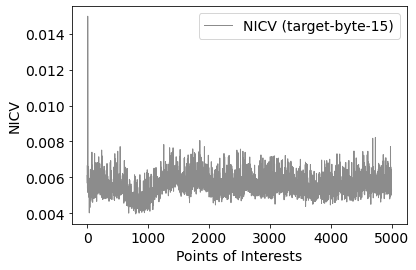

In [5]:
fig, ax = plt.subplots()
ax.plot(nicv_results['time'], nicv_results['nicv-value'], color='grey', 
        linestyle='-', linewidth=1, alpha=0.9, label="NICV ({})".format(f_name))

legend_without_duplicate_labels(ax, loc="upper right")
plt.xlabel('Points of Interests')
plt.ylabel("NICV")
plt.xticks(x_ticks)
if not data_params["override_max_y_tick"]:
    plt.yticks([0, 1])

nicv_plot_path = os.path.join(data_params['input_path'], f_name + "-plot.png")
plt.savefig(nicv_plot_path, dpi=150, bbox_inches='tight')
plt.show()